In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import time

In [ ]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
#Define a list of (weights, biases tuples, one for each layer."
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [ ]:
#layer_sizes=[1, 8, 1]
#layer_sizes

In [ ]:
# Define a sigmoid activation function. Can also be used from library. This is a simple definition.
def sigmoid_activation(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

In [ ]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)    
    return outputs

In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 8, 1])

In [ ]:
dydx = elementwise_grad(y, 1) # this is the partial derivative of y w/t x

In [ ]:
y0 = 0.0
x = np.linspace(0, 20).reshape((-1, 1))

In [ ]:
# Define the objective function.
def lossfunction(params, step):
    # The objective is to minimize to zero.
    # dydx = -k * exp(-x)
    # dy/dx = 2x^3 - exp(-x) # This is the real equation that we want to solve in the current notebook.
    zeq = dydx(params, x) - (2*(x**4) + np.exp(-x))
    ic = y(params, 0) - y0 # For my solution i.e. a set of paramaters 'params' this condition should be satisfied
    # since this is the intial condition.
    # If I minimize zeq and ic together or in some combined form, I will get a set of 'params' that give me
    # solution of dy/dx
    # Let us setup the loss function as zeq + ic
    return np.mean(zeq**2) + ic**2

In [ ]:
def callback(params, step, g):
    if step % 500 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,
                                                      lossfunction(params, step)))

In [ ]:
#ODE solver for 8 nodes
#grad(losfunciton) = d J(theta) / d theta
begin_at=time.time()
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at=time.time()
duration_8=end_at-begin_at
error_8=float(lossfunction(params,100000))
print(f" duration for 8 nodes= {duration_8}")
print(f" error for 8 nodes= {error_8}")

Iteration   0 lossfunction [[1.22020821e+10]]
Iteration 500 lossfunction [[9.63441795e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 1000 lossfunction [[7.59218185e+09]]
Iteration 1500 lossfunction [[7.3574958e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


Iteration 2000 lossfunction [[7.17193705e+09]]
Iteration 2500 lossfunction [[6.9762008e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Iteration 3000 lossfunction [[6.78512758e+09]]
Iteration 3500 lossfunction [[6.61094929e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: invalid value encountered in true_divide
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 4000 lossfunction [[nan]]
Iteration 4500 lossfunction [[nan]]
Iteration 5000 lossfunction [[nan]]
Iteration 5500 lossfunction [[nan]]
Iteration 6000 lossfunction [[nan]]
Iteration 6500 lossfunction [[nan]]
Iteration 7000 lossfunction [[nan]]
Iteration 7500 lossfunction [[nan]]
Iteration 8000 lossfunction [[nan]]
Iteration 8500 lossfunction [[nan]]
Iteration 9000 lossfunction [[nan]]
Iteration 9500 lossfunction [[nan]]
 duration for 8 nodes= 47.40805649757385
 error for 8 nodes= nan


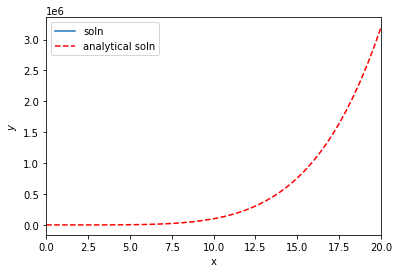

In [ ]:
#Plot for 8 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/2)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

### Number of nodes 10

In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 10, 1])

In [ ]:
#ODE solver 10 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=20000, callback=callback) 
end_at = time.time()
duration_10 = end_at-begin_at
error_10 = float(lossfunction(params, 100000))
print(f" duration for 8 nodes= {duration_10}")
print(f" error for 8 nodes= {error_10}")

Iteration   0 lossfunction [[1.22020825e+10]]
Iteration 500 lossfunction [[9.67170461e+09]]
Iteration 1000 lossfunction [[7.73518008e+09]]
Iteration 1500 lossfunction [[7.65606359e+09]]
Iteration 2000 lossfunction [[7.65473443e+09]]
Iteration 2500 lossfunction [[7.65362918e+09]]
Iteration 3000 lossfunction [[7.6525635e+09]]
Iteration 3500 lossfunction [[7.65151106e+09]]
Iteration 4000 lossfunction [[7.65045836e+09]]
Iteration 4500 lossfunction [[7.64941214e+09]]
Iteration 5000 lossfunction [[7.64834556e+09]]
Iteration 5500 lossfunction [[7.64728746e+09]]
Iteration 6000 lossfunction [[7.64621614e+09]]
Iteration 6500 lossfunction [[7.64517994e+09]]
Iteration 7000 lossfunction [[7.64409311e+09]]
Iteration 7500 lossfunction [[7.64302716e+09]]
Iteration 8000 lossfunction [[7.64196015e+09]]
Iteration 8500 lossfunction [[7.64093446e+09]]
Iteration 9000 lossfunction [[7.63982646e+09]]
Iteration 9500 lossfunction [[7.63876017e+09]]
Iteration 10000 lossfunction [[7.63770458e+09]]
Iteration 10500

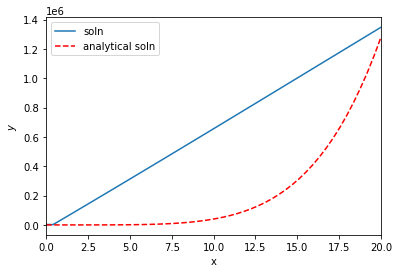

In [ ]:
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/5)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [ ]:
y_10=y(params,tfit)

### Number of nodes 20

In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 20, 1])

In [ ]:
# ODE solver for 20 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at = time.time()
duration_20 = end_at-begin_at
error_20 = float(lossfunction(params, 100000))
print(f" duration for 20 nodes= {duration_20}")
print(f" error for 20 nodes= {error_20}")

Iteration   0 lossfunction [[1.22020775e+10]]
Iteration 500 lossfunction [[8.64252479e+09]]
Iteration 1000 lossfunction [[7.65657941e+09]]
Iteration 1500 lossfunction [[7.65312295e+09]]
Iteration 2000 lossfunction [[7.6511462e+09]]
Iteration 2500 lossfunction [[7.64919933e+09]]
Iteration 3000 lossfunction [[7.64729606e+09]]
Iteration 3500 lossfunction [[7.64535714e+09]]
Iteration 4000 lossfunction [[7.6434111e+09]]
Iteration 4500 lossfunction [[7.64151873e+09]]
Iteration 5000 lossfunction [[7.63957551e+09]]
Iteration 5500 lossfunction [[7.63766645e+09]]
Iteration 6000 lossfunction [[7.63572079e+09]]
Iteration 6500 lossfunction [[7.63380656e+09]]
Iteration 7000 lossfunction [[7.63190511e+09]]
Iteration 7500 lossfunction [[7.62998128e+09]]
Iteration 8000 lossfunction [[7.62806794e+09]]
Iteration 8500 lossfunction [[7.62615186e+09]]
Iteration 9000 lossfunction [[7.62424716e+09]]
Iteration 9500 lossfunction [[7.62244669e+09]]
 duration for 20 nodes= 45.4452748298645
 error for 20 nodes= 76

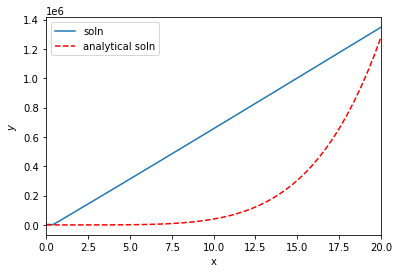

In [ ]:
#plot for 20 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/5)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [ ]:
y_20=y(params,tfit)

# No. of nodes 30 

In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 30, 1])

In [ ]:
# ODE solver for 30 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at = time.time()
duration_30 = end_at-begin_at
error_30 = float(lossfunction(params, 100000))
print(f" duration for 30 nodes= {duration_30}")
print(f" error for 30 nodes= {error_30}")

Iteration   0 lossfunction [[1.22020805e+10]]
Iteration 500 lossfunction [[7.74684415e+09]]
Iteration 1000 lossfunction [[7.18244901e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Iteration 1500 lossfunction [[6.76167346e+09]]
Iteration 2000 lossfunction [[6.24852721e+09]]
Iteration 2500 lossfunction [[5.70267418e+09]]
Iteration 3000 lossfunction [[5.17825543e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


Iteration 3500 lossfunction [[4.71067673e+09]]
Iteration 4000 lossfunction [[4.32178352e+09]]
Iteration 4500 lossfunction [[4.02141842e+09]]
Iteration 5000 lossfunction [[3.81015985e+09]]
Iteration 5500 lossfunction [[3.67647367e+09]]
Iteration 6000 lossfunction [[3.60335464e+09]]
Iteration 6500 lossfunction [[3.56880107e+09]]
Iteration 7000 lossfunction [[3.55562508e+09]]
Iteration 7500 lossfunction [[3.55068605e+09]]
Iteration 8000 lossfunction [[3.54811735e+09]]
Iteration 8500 lossfunction [[3.54709223e+09]]
Iteration 9000 lossfunction [[3.54672299e+09]]
Iteration 9500 lossfunction [[3.54512572e+09]]
 duration for 30 nodes= 41.780354738235474
 error for 30 nodes= 3544773018.9889865


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


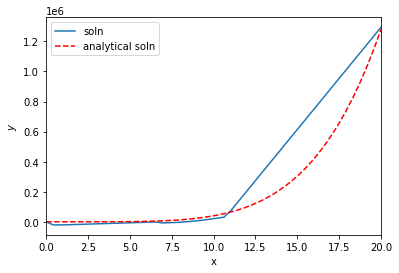

In [ ]:
#plot for 30 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/5)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [ ]:
y_30=y(params,tfit)

/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


# No. of nodes 40

In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 40, 1])

In [ ]:
# ODE solver for 40 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at = time.time()
duration_40 = end_at-begin_at
error_40 = float(lossfunction(params, 100000))
print(f" duration for 40 nodes= {duration_40}")
print(f" error for 40 nodes= {error_40}")

Iteration   0 lossfunction [[1.22020755e+10]]
Iteration 500 lossfunction [[7.69892611e+09]]
Iteration 1000 lossfunction [[7.19924215e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 1500 lossfunction [[6.76094269e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Iteration 2000 lossfunction [[6.25783758e+09]]
Iteration 2500 lossfunction [[5.69547846e+09]]
Iteration 3000 lossfunction [[5.13630873e+09]]
Iteration 3500 lossfunction [[4.6127659e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


Iteration 4000 lossfunction [[4.14819026e+09]]
Iteration 4500 lossfunction [[3.75738741e+09]]
Iteration 5000 lossfunction [[3.44525028e+09]]
Iteration 5500 lossfunction [[3.21015959e+09]]
Iteration 6000 lossfunction [[3.04666195e+09]]
Iteration 6500 lossfunction [[2.94405499e+09]]
Iteration 7000 lossfunction [[2.88517213e+09]]
Iteration 7500 lossfunction [[2.85158973e+09]]
Iteration 8000 lossfunction [[2.83128638e+09]]
Iteration 8500 lossfunction [[2.8166959e+09]]
Iteration 9000 lossfunction [[2.80459705e+09]]
Iteration 9500 lossfunction [[2.79367579e+09]]
 duration for 40 nodes= 43.40339469909668
 error for 40 nodes= 2783857873.5547113


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


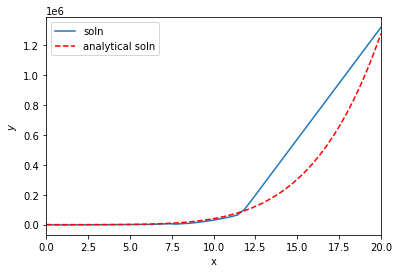

In [ ]:
#plot for 40 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/5)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [ ]:
y_40=y(params,tfit)

/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 50, 1])

# No. of nodes 50

In [ ]:
# ODE solver for 50 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at = time.time()
duration_50 = end_at-begin_at
error_50 = float(lossfunction(params, 100000))
print(f" duration for 50 nodes= {duration_50}")
print(f" error for 50 nodes= {error_50}")

Iteration   0 lossfunction [[1.2202077e+10]]
Iteration 500 lossfunction [[7.47712034e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Iteration 1000 lossfunction [[6.91192013e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 1500 lossfunction [[6.272266e+09]]
Iteration 2000 lossfunction [[5.5233064e+09]]
Iteration 2500 lossfunction [[4.78648624e+09]]
Iteration 3000 lossfunction [[4.13282066e+09]]
Iteration 3500 lossfunction [[3.59947455e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


Iteration 4000 lossfunction [[3.20163567e+09]]
Iteration 4500 lossfunction [[2.92716433e+09]]
Iteration 5000 lossfunction [[2.7493891e+09]]
Iteration 5500 lossfunction [[2.63661806e+09]]
Iteration 6000 lossfunction [[2.56133442e+09]]
Iteration 6500 lossfunction [[2.50672866e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: invalid value encountered in true_divide
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 7000 lossfunction [[nan]]
Iteration 7500 lossfunction [[nan]]
Iteration 8000 lossfunction [[nan]]


In [ ]:
#plot for 50 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/5)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [ ]:
y_50=y(params,tfit)

# No. of nodes 60

In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 60, 1])

In [ ]:
# ODE solver for 60 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at = time.time()
duration_60 = end_at-begin_at
error_60 = float(lossfunction(params, 100000))
print(f" duration for 60 nodes= {duration_60}")
print(f" error for 60 nodes= {error_60}")

Iteration   0 lossfunction [[1.22020744e+10]]
Iteration 500 lossfunction [[7.33140655e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Iteration 1000 lossfunction [[6.67137818e+09]]
Iteration 1500 lossfunction [[5.84151362e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 2000 lossfunction [[4.95942699e+09]]
Iteration 2500 lossfunction [[4.19545532e+09]]
Iteration 3000 lossfunction [[3.63356786e+09]]
Iteration 3500 lossfunction [[3.28436277e+09]]
Iteration 4000 lossfunction [[3.10179435e+09]]
Iteration 4500 lossfunction [[3.02039165e+09]]
Iteration 5000 lossfunction [[2.98982087e+09]]
Iteration 5500 lossfunction [[2.97985706e+09]]
Iteration 6000 lossfunction [[2.9770113e+09]]
Iteration 6500 lossfunction [[2.97604775e+09]]
Iteration 7000 lossfunction [[2.97576627e+09]]
Iteration 7500 lossfunction [[2.97563856e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


Iteration 8000 lossfunction [[2.97572053e+09]]
Iteration 8500 lossfunction [[2.97553322e+09]]
Iteration 9000 lossfunction [[2.97553769e+09]]
Iteration 9500 lossfunction [[2.97555412e+09]]
 duration for 60 nodes= 43.16299510002136
 error for 60 nodes= 2975818363.4448166


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


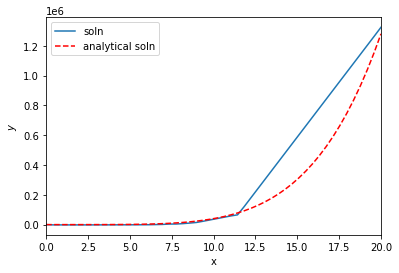

In [ ]:
#plot for 60 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/5)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [ ]:
y_60=y(params,tfit)

/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


# No. of nodes 80

In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 80, 1])

In [ ]:
# ODE solver for 80 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at = time.time()
duration_80 = end_at-begin_at
error_80 = float(lossfunction(params, 100000))
print(f" duration for 80 nodes= {duration_80}")
print(f" error for 80 nodes= {error_80}")

Iteration   0 lossfunction [[1.2202083e+10]]
Iteration 500 lossfunction [[7.38278433e+09]]
Iteration 1000 lossfunction [[6.88744184e+09]]
Iteration 1500 lossfunction [[6.24536918e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Iteration 2000 lossfunction [[5.51066166e+09]]
Iteration 2500 lossfunction [[4.75505897e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 3000 lossfunction [[4.04067174e+09]]
Iteration 3500 lossfunction [[3.40443516e+09]]
Iteration 4000 lossfunction [[2.87375702e+09]]
Iteration 4500 lossfunction [[2.46431121e+09]]
Iteration 5000 lossfunction [[2.17670142e+09]]
Iteration 5500 lossfunction [[1.99576539e+09]]
Iteration 6000 lossfunction [[1.89334217e+09]]
Iteration 6500 lossfunction [[1.83976019e+09]]
Iteration 7000 lossfunction [[1.81322617e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


Iteration 7500 lossfunction [[1.79803995e+09]]
Iteration 8000 lossfunction [[1.78778897e+09]]
Iteration 8500 lossfunction [[1.78118117e+09]]
Iteration 9000 lossfunction [[1.77695062e+09]]
Iteration 9500 lossfunction [[1.77417352e+09]]
 duration for 80 nodes= 44.590559005737305
 error for 80 nodes= 1772191280.6630428


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


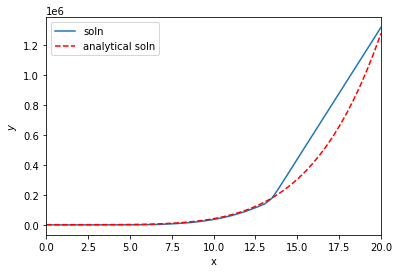

In [ ]:
#plot for 80 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/5)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [ ]:
y_80=y(params,tfit)

/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


# No. of nodes 90

In [ ]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 90, 1])

In [ ]:
# ODE solver for 90 nodes
begin_at = time.time() 
params = adam(grad(lossfunction), params,
              step_size=0.1, num_iters=10000, callback=callback) 
end_at = time.time()
duration_90 = end_at-begin_at
error_90 = float(lossfunction(params, 100000))
print(f" duration for 90 nodes= {duration_90}")
print(f" error for 90 nodes= {error_90}")

Iteration   0 lossfunction [[1.22020732e+10]]
Iteration 500 lossfunction [[7.45414524e+09]]
Iteration 1000 lossfunction [[7.13713094e+09]]
Iteration 1500 lossfunction [[6.69954042e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 2000 lossfunction [[6.20630787e+09]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Iteration 2500 lossfunction [[5.67198777e+09]]
Iteration 3000 lossfunction [[5.10457215e+09]]
Iteration 3500 lossfunction [[4.54834723e+09]]
Iteration 4000 lossfunction [[4.01659295e+09]]
Iteration 4500 lossfunction [[3.5166186e+09]]
Iteration 5000 lossfunction [[3.05699305e+09]]
Iteration 5500 lossfunction [[2.63652423e+09]]
Iteration 6000 lossfunction [[2.25071087e+09]]
Iteration 6500 lossfunction [[1.90292806e+09]]
Iteration 7000 lossfunction [[1.59819667e+09]]
Iteration 7500 lossfunction [[1.34193574e+09]]
Iteration 8000 lossfunction [[1.13564144e+09]]
Iteration 8500 lossfunction [[9.77345501e+08]]
Iteration 9000 lossfunction [[8.61981131e+08]]
Iteration 9500 lossfunction [[7.82007297e+08]]


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


 duration for 90 nodes= 44.22644925117493
 error for 90 nodes= 727804659.4938858


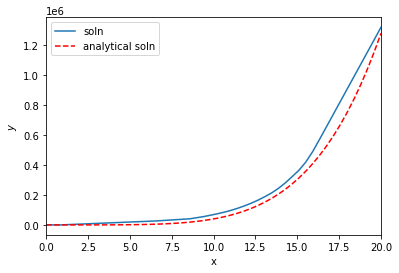

In [ ]:
#plot for 90 nodes
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit, (((2*x**5)/5)-np.exp(-x)+y0+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [ ]:
y_90=y(params,tfit)

# Plot for node VS. Duration

In [ ]:
Nodes=[10,20,30,40,50,60,80,90]
Duration=[duration_10,duration_20,duration_30,duration_40,duration_50,duration_60,duration_80,duration_90]
Error=[error_10,error_20,error_30,error_40,error_50,error_60,error_80,error_90]

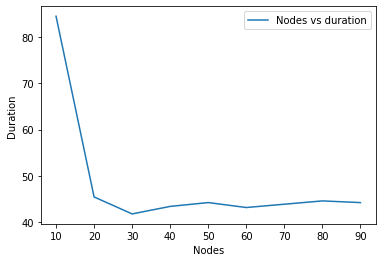

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Nodes,Duration,label='Nodes vs duration') 
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Duration')
#plt.xlim([0, 20])
plt.savefig('odenn.png')

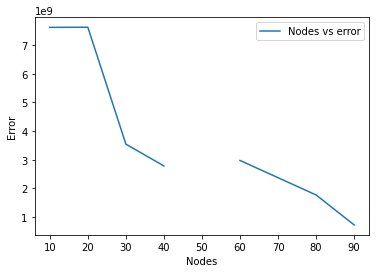

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Nodes,Error,label='Nodes vs error') 
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Error')
#plt.xlim([0, 20])
plt.savefig('odenn.png')